# Problem 1.3

(c) Sketch the graph of $\rho(x)$

$$
    \rho(x) = \sqrt{\frac{\lambda}{\pi}} e^{-\lambda(x-a)^{2}}
$$

(0.0, 2.571053887278759e-06)

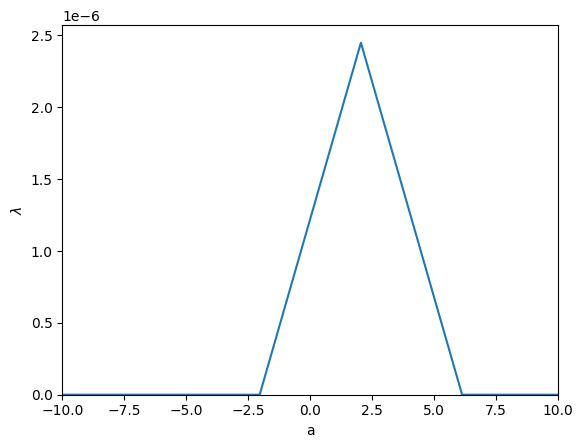

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def prob_dens(x,l,a):
    return np.sqrt(l/np.pi)*np.exp(-l*(x-a)**2)

num = np.linspace(-100,100)
l = 4*np.pi
a = 1

plt.plot(num,prob_dens(num,l,a))
plt.xlabel('a')
plt.ylabel(r'$\lambda$')
plt.xlim(-10,10)
plt.ylim(0)

